# TWITTER DISASTER DATASET

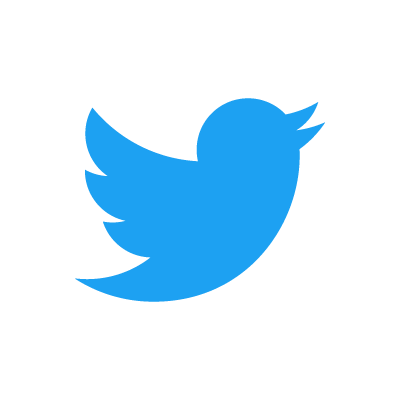

Main aim of this Project is to predict weather a given Tweet in the dataset is based upon a real Disaster or not.

As the tweet is text hence this project comes under Natural Language Processing(NLP).

Iam using word embedding with Nueral Networks using Keras for this project.

Feature Description:
    
    id - a unique identifier for each tweet
    text - the text of the tweet
    location - the location the tweet was sent from (may be blank)
    keyword - a particular keyword from the tweet (may be blank)
    target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)



link of the dataset: https://www.kaggle.com/c/17777/download-all

**Importing Libraries**

Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Pandas is mainly used for machine learning in form of dataframes.

In [0]:
#importing numpy and pandas
import numpy as np
import pandas as pd

#importing matplotlib for plotting graphs 
import matplotlib.pyplot as plt

#importing test train split from sklearn for dividing the dataset into train and test data.
from sklearn.model_selection import train_test_split


TensorFlow is a Python library for fast numerical computing created and released by Google. It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.

Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow.

In [0]:
#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

**Data loading**

reading csv file using read_csv(), it is a pandas function.
path of the file is passed as argument in quotes.

In [0]:
df=pd.read_csv('/content/drive/My Drive/dataset/TwitterTrain.csv')

Taking a look at the dataset.

In [393]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**Data Preprocessing**

As we are predicting weather the Text in thr Tweet is based on real disaster or not id, keyword and location columns do not help in any way in predicting as id number have no significance weather the tweet is based on real disaster or not. Similarly location as location tells us that from which location the tweet was made, tweet can be made anywhere in the world so it may mislead in predicting target, simimlarly keyword which is a word from the tweet (many are NanN values) hence it is better to frop all the 3 columns.

In [0]:
#dropping columns id, keyword, location
df=df.drop(['id','keyword','location'],axis=1)

Looking at the cleaned Dataset

In [395]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


**Visualising instances of Target**

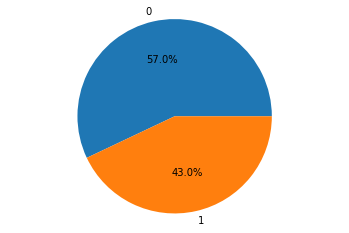

In [396]:
fig1, ax1 = plt.subplots()
a,b=df['target'].value_counts()
sizes=[a,b]
labels=['0','1']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

here 1 means Tweet is based upon real disater whereas 0 means tweet not based on real disaster.

Here dataset is little shifted towards 0(i.e tweets not based upon real disasters).

More or less percentages 43% and 57% are close to 50.

Hence we are good to go.

Looking at one of the tweet ---->

In [397]:
df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [398]:
df['target'].values

array([1, 1, 1, ..., 1, 1, 1])


clean_word() function replaces puctuations in words that may be there in the word while it got splitted based on space.

This is done so that only pure word is left out. for example: 'Hi!' in this word '!' will be removed and 'Hi' will be left out for processing.

Doing this will result in better understanding of the word in the model which will hekp while predicting.

In [0]:
#Function to clean token vector of symbols

def clean_word(word_list):
  new = []
  for i, word in enumerate(word_list):
    word = word.replace('.', '')
    word = word.replace(',', '')
    word = word.replace(';', '')
    word=word.replace('!','')
    word=word.replace('?','')
    word=word.replace('#','')

    word = word.lower()
    if word.isalpha() or word.isdigit():
      new.append(word)
    
  return new

# Word Embedding

text_arr will have words splitted on a basis of space in a tweet placed in a list.(row)

In [400]:
text = df['text'].values

# Tokenize each sentence 
text_arr = [row.split(' ') for row in text]
text_arr

[['Our',
  'Deeds',
  'are',
  'the',
  'Reason',
  'of',
  'this',
  '#earthquake',
  'May',
  'ALLAH',
  'Forgive',
  'us',
  'all'],
 ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada'],
 ['All',
  'residents',
  'asked',
  'to',
  "'shelter",
  'in',
  "place'",
  'are',
  'being',
  'notified',
  'by',
  'officers.',
  'No',
  'other',
  'evacuation',
  'or',
  'shelter',
  'in',
  'place',
  'orders',
  'are',
  'expected'],
 ['13,000',
  'people',
  'receive',
  '#wildfires',
  'evacuation',
  'orders',
  'in',
  'California',
  ''],
 ['Just',
  'got',
  'sent',
  'this',
  'photo',
  'from',
  'Ruby',
  '#Alaska',
  'as',
  'smoke',
  'from',
  '#wildfires',
  'pours',
  'into',
  'a',
  'school',
  ''],
 ['#RockyFire',
  'Update',
  '=>',
  'California',
  'Hwy.',
  '20',
  'closed',
  'in',
  'both',
  'directions',
  'due',
  'to',
  'Lake',
  'County',
  'fire',
  '-',
  '#CAfire',
  '#wildfires'],
 ['#flood',
  '#disaster',
  'Heavy',
  'rain',
  'causes',
  'flas

Here each row in text_arr is called and cleaned using clean_word() function and appended in a variable vocab to create vocabulary.

clean_text_array will have cleaned rows in list form whereas vocab will have words as element.

In [0]:
# clean every token word and create vocabulary out of it.
vocab = []
clean_text_array = []

for row in text_arr:
  clean_row = clean_word(row)
  clean_text_array.append(clean_row)
  vocab.extend(clean_row)

vocabulary will have unique cleaned words. set() removes duplicates and sorts. 

In [0]:
# create a vocabulary - making sure each word appears only once
vocabulary = list(set(clean_word(vocab)))

In [403]:
len(vocabulary)

13347

Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels

Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector

In [0]:
from sklearn.preprocessing import LabelEncoder
vectorizer = LabelEncoder()
vectorizer.fit(vocabulary)

# Create token vector using Label Encoder fit on entire vocabulary
token_vector = []

# declare max_words to keep count of the longest sentence vectorized
# we need this to pad every other vector to same length as longest vector
max_words = 0 
for row in clean_text_array:
  encoded = vectorizer.transform(row).tolist()
  size = len(encoded)
  if size>max_words: max_words=size
  token_vector.append(encoded)


looking at a random word in vectorizor by encoded code.

Here word 'aussies' is coded as 1000 using label encoder.

In [405]:
vectorizer.classes_[1000]

'aussies'

maximum words in a vectorized sentence is 31

In [406]:
max_words

31

Sentences with words < 31 will be padded with 0s at the end.

In [0]:
# Pad every vector in token vector corpus to be as long as longest vector
padded = []
for row in token_vector:
  r = np.pad(row, (0, max_words-len(row)), 'constant')
  padded.append(r)

In [0]:
# Convert it into numpy array, we'll call this the examples vector
# as it contains all the example to be trained on
ex_vector = np.array(padded)

In [409]:
ex_vector.shape

(7613, 31)

target variable denotes weather the tweet is based on real disaster or not.

In [0]:
target=df['target'].values

split the ex_vector and target into train and test dataset using train_test_split from sklearn library.

In [0]:
# Split the data into test & train dataset
xtrain, xtest, ytrain, ytest = train_test_split(ex_vector,target, test_size=0.1)

creating **Tensor** for word embedding.

This Tensor is used in embedding Layer in the model.

In [0]:
# Create a tensor out of numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest))

creating batches for shuffling the train and test dataset tensors.

In [0]:
# shuffle the data and create batches out of it
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

**Model**

In [0]:
# Define the embedding dimensions // features around which the model will learn
# correlatin based on.
embedding_dim=20

# defining the sequential model with an Embedding layer
# Add a Global Average Pooling 1D layer to flattent the matrix into vector
model = keras.models.Sequential([
  keras.layers.Embedding(13347, embedding_dim),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

**Compiling model**

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

**Training the model**

In [416]:
# Train the model and benchmark against Test Data as it's validation data
epochs=10
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)

Epoch 1/10
108/108 - 1s - loss: 0.6790 - accuracy: 0.5713 - val_loss: 0.6717 - val_accuracy: 0.5617
Epoch 2/10
108/108 - 0s - loss: 0.6402 - accuracy: 0.6093 - val_loss: 0.6195 - val_accuracy: 0.6850
Epoch 3/10
108/108 - 0s - loss: 0.5578 - accuracy: 0.7555 - val_loss: 0.5541 - val_accuracy: 0.7598
Epoch 4/10
108/108 - 0s - loss: 0.4741 - accuracy: 0.8241 - val_loss: 0.5048 - val_accuracy: 0.7887
Epoch 5/10
108/108 - 0s - loss: 0.3999 - accuracy: 0.8590 - val_loss: 0.4755 - val_accuracy: 0.7979
Epoch 6/10
108/108 - 0s - loss: 0.3445 - accuracy: 0.8787 - val_loss: 0.4605 - val_accuracy: 0.8031
Epoch 7/10
108/108 - 0s - loss: 0.2946 - accuracy: 0.8942 - val_loss: 0.4570 - val_accuracy: 0.8018
Epoch 8/10
108/108 - 0s - loss: 0.2568 - accuracy: 0.9101 - val_loss: 0.4603 - val_accuracy: 0.8018
Epoch 9/10
108/108 - 0s - loss: 0.2298 - accuracy: 0.9219 - val_loss: 0.4679 - val_accuracy: 0.7927
Epoch 10/10
108/108 - 0s - loss: 0.2020 - accuracy: 0.9327 - val_loss: 0.4803 - val_accuracy: 0.7927


**Accuracy: 92%**

**validation accuray: 80%**

Validation accuracy is based upon the test dataset.

Plotting accuracy curve:

it shows how the actual accuracy and validation accuracy is effected over the training period.

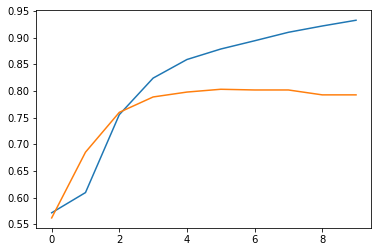

In [417]:
# Plot Accuracy
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])


with this curve we can learn whether the model is overtrained or not.

if the curves starts diverging from each other then the model is overtrained.

Here the model is fairly trained as they are kind of parallel.

PLotting Loss curve:

This curve shows how the actual loss and validation loss are reducing while training.

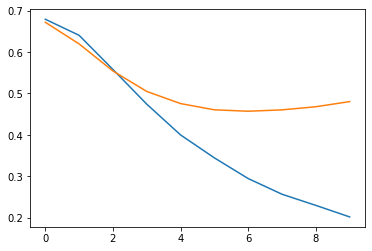

In [418]:
# Plot Loss
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])

model is not overtrained as the loss curves are kind of parallel.
Curves close to each other would have been a better scenario.

# Predicting target based on training

A quick look at the dataset.....

In [419]:
df.head(10)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,1
9,I'm afraid that the tornado is coming to our a...,1


Any random data is taken from the test dataset.

Here first 10 rows are taken.

In [0]:
data=df['text'][:10]

looking at the tweets

In [421]:
data

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

splitting tweet based upon space and storing it in a list.

In [0]:
text_arr = [row.split(' ') for row in data]

In [423]:
len(text_arr)

10

Cleaning the text.

In [0]:
clean_text=[]

for row in text_arr:
  clean_row=clean_word(row)
  clean_text.append(clean_row)

tokenising words in test dataset based on the vectorizer built previously.

In [0]:
test_token_vector = []

for row in clean_text:
  encoded = vectorizer.transform(row).tolist()
  test_token_vector.append(encoded)


padding 0s at the end.

Here max words still remains the same=31

In [0]:
padded = []
for row in test_token_vector:
  r = np.pad(row, (0, max_words-len(row)), 'constant')
  padded.append(r)

predicting using model.predict()

In [0]:
pred=model.predict(np.array(padded))

printing the predicted output 

In [428]:
res=[]
for op in np.round(pred):
  res.append(op)
  print(op)

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


actual target

In [429]:
b=df['target'][:10].tolist()
b

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

simple accuracy function to calculate accuracy based on how many correct targets the model predicts.  

In [0]:
def accuracy():
  score=0
  for i in range(len(res)):
    if res[i]==b[i]:
      score+=1
  result=(score/len(res))*100
  print(f"accuracy: {result}%")

In [431]:
accuracy()

accuracy: 100.0%


for the first 10 tweets in the dataset model predicts with 100% accuracy.

In [432]:
model.save("TwitterModel")

INFO:tensorflow:Assets written to: TwitterModel/assets


model is saved for future usage.